# Vector

In [1]:
from typing import List, Tuple, Callable


In [2]:
Vector = List[float]

In [3]:
height_weight_age = [70, 170, 40]
grades = [90, 80, 75, 62]

In [4]:
'''adding vectors'''

def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i + w_i for v_i, w_i in zip(v, w)   
           ]

assert add([1,2,3], [4,5,6]) == [5,7,9], 'not expected data'

In [5]:
'''subtracting vectors'''
def sub(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i - w_i for v_i, w_i in zip(v, w)   
           ]

assert sub([5,7,9], [4,5,6]) == [1,2,3], 'not expected data'

In [6]:
'''sum of all corresponding elements'''
def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, 'no vectors provided'
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), 'different sizes'
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

assert vector_sum([[1,2], [3,4], [5,6], [7,8]]) == [16,20]

# Scalar Multiply

In [7]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

assert scalar_multiply(2.0,[1,2,3]) == [2,4,6], 'didnot match the expected data'

In [8]:
def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [9]:
assert vector_mean([[1,2], [3,4], [5,6]]) == [3,4]

# Dot Product

In [10]:
def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), 'len of vectors dont match'
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

assert dot([1,2,3], [4,5,6]) == 32

In [11]:
def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

In [12]:
assert sum_of_squares([1,2,3]) == 14

In [13]:
import math

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v))

In [14]:
assert magnitude([3,4]) == 5

In [15]:
def squared_distance(v: Vector, w: Vector) -> float:
    return sum_of_squares(subtract(v,w))

In [16]:
def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v,w))

In [17]:
magnitude([4,3])

5.0

In [18]:
def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v,w))

# Matrices

In [19]:
Matrix = List[List[float]]

In [20]:
A = [[1,2,3],
     [4,5,6]
    ]

B = [[1,2],
    [3,4]
    ]

In [21]:
print(A[0][0])
print('lenght is :', len(A[0]))
print('no of cols:', len(A))

1
lenght is : 3
no of cols: 2


In [22]:
def shape(A) -> Tuple[int,int]:
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [23]:
assert shape([[1,2,3], [4,5,6]]) == (2,3), 'error on functions'

In [24]:

def get_row(A: Matrix, i: int) -> Vector:
    return A[i]

get_row([[1,2,3],[12,4]], 0)

[1, 2, 3]

In [25]:

def get_column(A, j: int) -> Vector:
    return [A_i[j] for A_i in A]

get_column([[1,2,3],[12,4]], 0)

[1, 12]

In [26]:
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    return [[entry_fn(i, j)
            for j in range(num_cols)]
            for i in range(num_rows)]

In [27]:
make_matrix(3, 4, lambda i, j: i*j if i == j else i - j)

[[0, -1, -2, -3], [1, 1, -1, -2], [2, 1, 4, -1]]

In [28]:
def identity_matrix(n: int) -> Matrix:
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [29]:
identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [30]:
data = [[70, 170, 40],
        [65, 120, 26],
        [77, 250, 19]
       ]

In [31]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [32]:
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [33]:
friend_matrix[0][1]

1

In [34]:
friend_matrix[5]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0]

In [35]:
friends_of_five = [
    i
    for j in range(5)
    for i, is_friend in enumerate(friend_matrix[j])
    if is_friend
]

In [36]:
friends_of_five

[1, 2, 0, 2, 3, 0, 1, 3, 1, 2, 4, 3, 5]

# Playground

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('baseball.csv')
df1 = df.head(3)
df1

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403


In [3]:
x = df1[['RS', 'RA']]
y = df1[['Year']]

In [4]:
x = np.asmatrix(x)
y = np.asmatrix(y)

In [5]:
print(x);print()
print(y)

[[734 688]
 [700 600]
 [712 705]]

[[2012]
 [2012]
 [2012]]


In [6]:
'''apple orange coconuts'''
'''two persons'''

data = np.array([[5, 3, 2], [7, 5, 1]])

'''price spended by the persons day 1 day2'''

price = np.array([[50, 49],
                 [30, 27],
                 [12, 12]])

In [7]:
np.dot(data, price)

array([[364, 350],
       [512, 490]])

In [8]:
from matplotlib import image
from matplotlib import pyplot

image = image.imread('Image2.png')
pyplot.imshow(image)
pyplot.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Image2.png'

In [ ]:
import numpy as np
from PIL import Image

im = np.array(Image.open('Image2.png').convert('L'))
print(im)


In [ ]:
b = im * 10
print(b)
values = [-5, -2, -1, 1, 2, 5]

for i in values:
    Image.fromarray(im * i).save(f'lal{i}.png')
# Image.fromarray(b).save('lal3.png')

In [ ]:
a = np.array([[3,4],[4,5]])
b = np.array([[-3, 0],[4, 5]])
print(a);print();print(b);print()
np.dot(a,b)

In [ ]:
a = np.array([2,4])
b = np.array([5,4])
np.dot(a,b)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
m1 = np.array([0,1,-1,0]).reshape(2,2)
print(m1);print()
print(np.linalg.inv(m1))

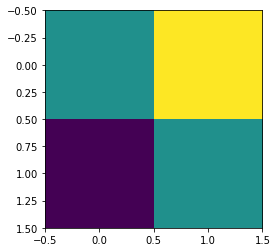

In [15]:
plt.imshow(m1)
plt.show()

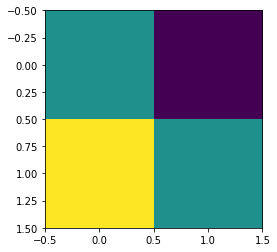

In [16]:
plt.imshow(np.linalg.inv(m1));plt.show()

In [17]:
m2 = np.arange(1,10).reshape(3,3)
print(m2)
print(np.linalg.inv(m2))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-4.50359963e+15  9.00719925e+15 -4.50359963e+15]
 [ 9.00719925e+15 -1.80143985e+16  9.00719925e+15]
 [-4.50359963e+15  9.00719925e+15 -4.50359963e+15]]


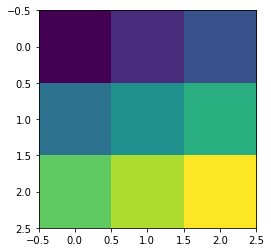

In [18]:
plt.imshow(m2);plt.show()

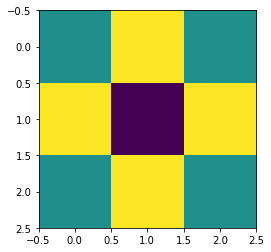

In [19]:
plt.imshow(np.linalg.inv(m2));plt.show()

[[1 3]
 [2 4]]

[[-2.   1.5]
 [ 1.  -0.5]]



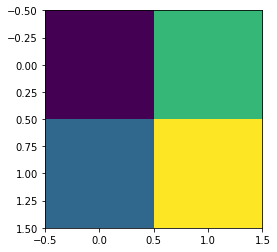

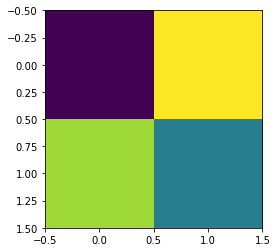

In [20]:
m3 = np.array([1,3, 2,4]).reshape(2,2)
print(m3);print();print(np.linalg.inv(m3));print()
plt.imshow(m3);plt.show()
plt.imshow(np.linalg.inv(m3));plt.show()

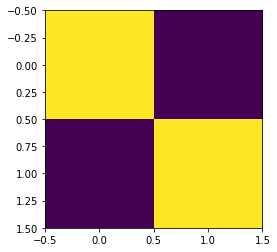

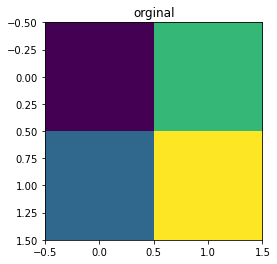

In [21]:
plt.imshow(np.dot(np.linalg.inv(m3), m3));plt.show()
plt.imshow(m3);plt.title('orginal');plt.show()

In [22]:
print(np.dot(np.linalg.inv(m3), m3))

[[1. 0.]
 [0. 1.]]


In [28]:
orginal_stage = np.array([[2,4],[8,10]])
inv_stage = np.linalg.inv(orginal_stage)

In [29]:
orginal_stage

array([[ 2,  4],
       [ 8, 10]])

In [30]:
inv_stage

array([[-0.83333333,  0.33333333],
       [ 0.66666667, -0.16666667]])

In [31]:
#lets back to orginal stage
np.linalg.inv(inv_stage)

array([[ 2.,  4.],
       [ 8., 10.]])

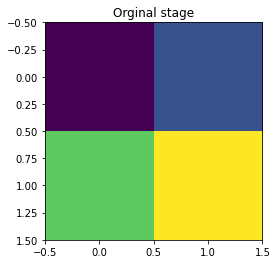

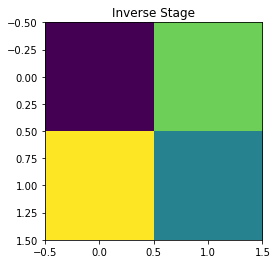

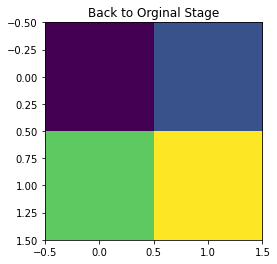

In [32]:
plt.imshow(orginal_stage);plt.title('Orginal stage');plt.show()
plt.imshow(inv_stage);plt.title('Inverse Stage');plt.show()
plt.imshow(np.linalg.inv(inv_stage));plt.title('Back to Orginal Stage');plt.show()